In [1]:
import matplotlib.pyplot as plt
import csv
import os
import re
import numpy as np
from scipy.stats import pearsonr
from pandas import ewma
%matplotlib inline

pearson (0.38862066041565735, 1.9015390871420372e-16)


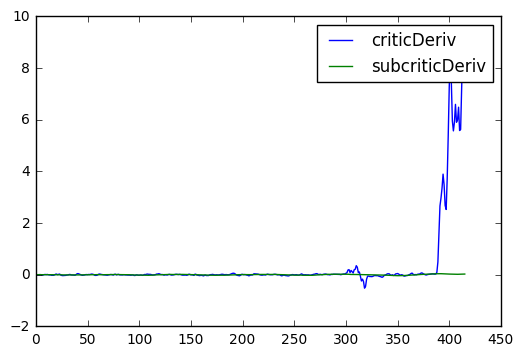

In [2]:
def nameToIndex(name, header):
    return header.index(name)

def readExperiment(filename):
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        rows = []
        for row in reader:
            rows.append(row)
        Critic_Q_mean_index = nameToIndex('Critic_Q_mean',rows[0])
        Critic_Q_mean_values = []
        subcriticIndex = nameToIndex('subcritic_layer0/subcritic_n0/Qtarget/Identity_2:0_mean', rows[0])
        subcritic_mean_values = []
        for row in rows[1:]:
            Critic_Q_mean_values.append(float(row[Critic_Q_mean_index]))
            subcritic_mean_values.append(float(row[subcriticIndex]))
        criticDeriv = np.gradient(Critic_Q_mean_values)
        subcriticDeriv = np.gradient(subcritic_mean_values)
        plt.plot(criticDeriv, label="criticDeriv")
        plt.plot(subcriticDeriv, label="subcriticDeriv")
        plt.legend()
        print('pearson',pearsonr(criticDeriv,subcriticDeriv))
#         deriv = np.gradient(Critic_Q_mean_values)
#         smoothedDeriv = ewma(deriv, com=100)
#         plt.plot(Critic_Q_mean_values, label=int(re.findall(r'\d+', filename)[0]))
#         plt.plot(deriv, label='deriv ' + re.findall(r'\d+', filename)[0])
#         plt.plot(smoothedDeriv, label='smoothedDeriv ' + re.findall(r'\d+', filename)[0])
            
        plt.legend()

def loadExperimentsOutput(outputDir='../output',episodesToAnalyze=[]):
    files = [outputDir + '/' + filename for filename in sorted(os.listdir(outputDir), key=lambda filename: int(re.findall(r'\d+', filename)[0]))]
    filteredFiles = files
    if episodesToAnalyze:
        filteredFiles = filter(lambda filename: int(re.findall(r'\d+', filename)[0]) in episodesToAnalyze, files)
    for file in filteredFiles:
        readExperiment(file)
loadExperimentsOutput(episodesToAnalyze=[70])

# Writeup

We use the [Pearson correlation coefficient](https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php) to determine the similarity between the derivatives of the global Q function critic and the local approximations we use a-la DDPG.

The motivation of the paper states that we wish to approximate this global Q using less expensive local Q approximator functions. We can ignore the magnitude and actual values of the two functions as we only wish to examine the updates, i.e. derivatives of these functions. Thus, we attempt to **find a positive correlation between $\frac{\partial Q_{global}}{\partial t}$ and $\frac{\partial Q_{local}}{\partial t}$.**

[According to statistics.laerd.com](https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php), this table can be used to roughly understand the importance of correlations between two functions.
![pearson table](pearson_table.png)

In the mountain car experiment, we find a Pearson r-value of 0.38862066041565735. Thus, we can infer that there is a "weak correlation" between the derivatives of the global and local function.

These numbers are not necessarily significant without smoothing. As the local approximations are inherently stochastic methods, we must apply some smoothing techniques to obtain reasonable results.